<a href="https://colab.research.google.com/github/AngelicaDC/BEDUpython/blob/main/ML/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

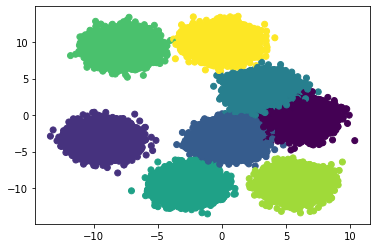

In [101]:
x, y = make_blobs(n_samples=100000, centers=8, n_features=2,)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [102]:
#Dividimos entre train y test.
#x es siempre las variables independientes y y es la independiente (la etiqueta).
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.8)
x_train.shape, x_test.shape

((20000, 2), (80000, 2))

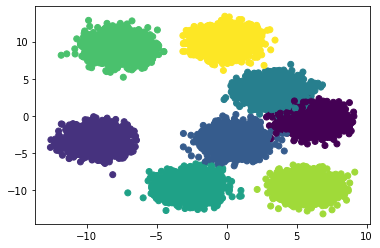

In [107]:
plt.scatter(x_train[:,0], x_train[:,1],c=y_train)
plt.show()

In [108]:
K = 6
#Entrenamos con x_train...
modelo_kmeans = KMeans(n_clusters = K ).fit(x_train)
#Y extraemos los centroides.
centroides = modelo_kmeans.cluster_centers_
print(centroides)
x_train.shape, y_train.shape

[[ 4.37289675  1.06186915]
 [-1.30463685 -6.93912594]
 [-7.68542539  9.24666459]
 [-9.30966    -3.37303402]
 [ 5.73737589 -9.54225822]
 [-0.07058631  9.9291113 ]]


((20000, 2), (20000,))

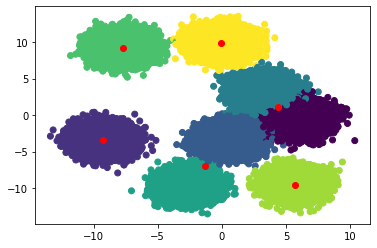

In [109]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.scatter(centroides[:,0], centroides[:,1], color="red")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


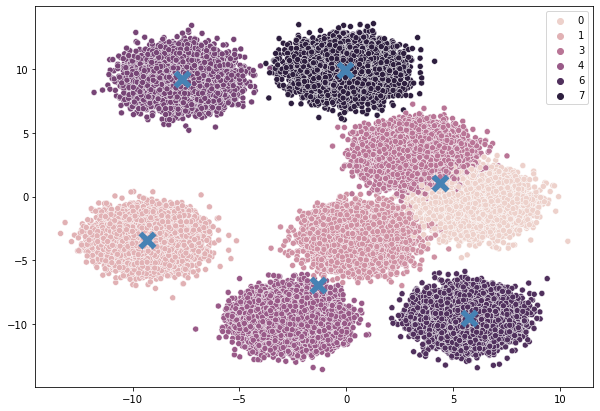

In [110]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(x[:, 0], x[:, 1], hue = y, zorder=100);
sns.scatterplot(centroides[:,0], centroides[:,1], color="steelblue", marker="x", s=15, zorder=1000,lw=10,linewidth=20)

In [111]:
data= pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2003.%20Clusterizaci%C3%B3n/Ejercicio%2001/datum-ej.csv")
data

,Sexo,Edad,Total_Ventas,Salario
0,M,46,29800,4100
1,H,68,83000,8125
2,M,60,66400,5775
3,H,49,25900,3400
4,H,22,0,7075
...,...,...,...,...
94,H,22,23300,7825
95,H,32,53600,5350
96,H,73,111800,8075
97,H,65,55400,5675


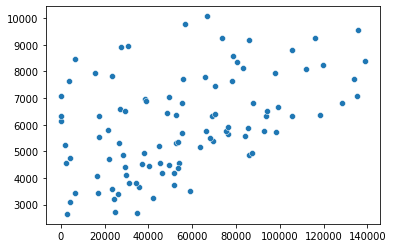

In [112]:
X=data.iloc[:,2:].values
x1 = X[:,0]
y1 = X[:,1]
sns.scatterplot(x=x1, y=y1)

## Elbow pint para encontrar el número K.
Inertia : Sum of squared distances of samples to their closest cluster center

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


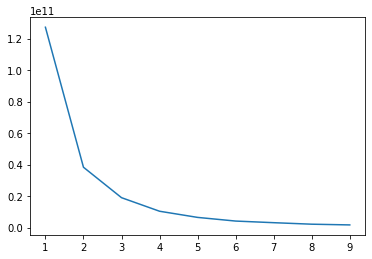

In [113]:
var=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i, init="k-means++", random_state=15)
  kmeans.fit(X)
  var.append(kmeans.inertia_)
sns.lineplot(range(1,10),var)

[[ 21512.19512195   5185.36585366]
 [113258.82352941   7382.35294118]
 [ 65460.97560976   6232.92682927]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


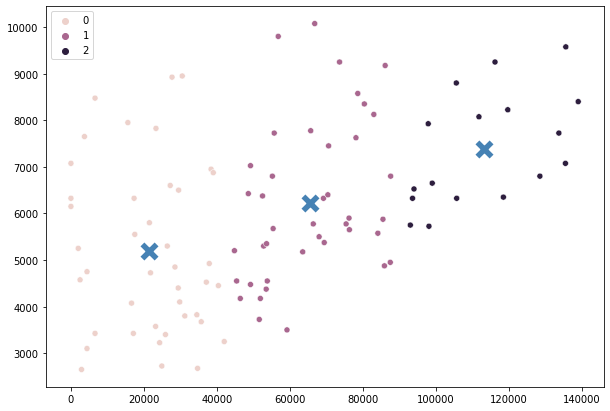

In [114]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(X)
print(kmeans.cluster_centers_)
clusters = kmeans.fit_predict(X)
data["label"] = clusters

fig, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(X[:,0],X[:,1],hue=data.label)
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
                color="steelblue", marker="x", s=15, zorder=10,lw=10,linewidth=20)